In [1]:
from qiskit import QuantumCircuit, transpile, assemble, Aer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to generate a random single-qubit Clifford gate
def random_single_qubit_clifford():
  rand_gate = np.random.randint(24) # 24 different Clifford gates
  qc = QuantumCircuit(1)
  if rand_gate < 8:
    qc.h(0)
    if rand_gate % 2 == 1:
      qc.s(0)
    if rand_gate % 4 == 3:
      qc.sdg(0)
  else:
    qc.s(0)
    qc.h(0)
    if rand_gate % 4 == 2:
      qc.sdg(0)
  return qc.to_gate()

In [3]:
# Function to create a random sequence of Clifford gates
def random_clifford_sequence(num_qubits, length):
  sequence = QuantumCircuit(num_qubits)
  for _ in range(length):
    sequence.append(random_single_qubit_clifford(),range(num_qubits))
  return sequence

In [4]:
# Function to perform randomized benchmarking on a single qubit
def randomized_benchmarking(num_qubits, num_sequences,max_sequence_length):
  backend = Aer.get_backend('qasm_simulator')
  gate_fidelities = []
  sequence_lengths = range(1, max_sequence_length + 1)
  for length in sequence_lengths:
    avg_success_prob = 0
    for _ in range(num_sequences):
      # Create the sequence of random Cliffords
      rb_circuit = random_clifford_sequence(num_qubits, length)
      # Add final Clifford gates (inverse of the initialsequence) for error mitigation
      inverse_clifford = random_clifford_sequence(num_qubits,length).inverse()
      rb_circuit &= inverse_clifford
      # Measure the final state
      rb_circuit.measure_all()
      # Execute the randomized benchmarking circuit
      t_circ = transpile(rb_circuit, backend)
      qobj = assemble(t_circ, shots=1024)
      result = backend.run(qobj).result()
      # Calculate the success probability (average fidelity)
      success_prob = result.get_counts(rb_circuit).get('0' * num_qubits, 0) / 1024
      avg_success_prob += success_prob
    # Calculate the average gate fidelity (normalized to Cliffordfidelity)
    gate_fidelity = avg_success_prob / (2 ** num_qubits - 1)
    gate_fidelities.append(gate_fidelity)
  return sequence_lengths, gate_fidelities

C:\Users\Samarth\AppData\Local\Temp\ipykernel_22824\1735373804.py:19: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


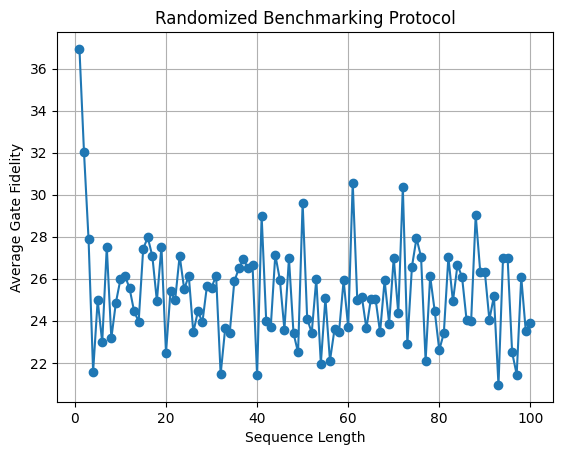

In [5]:
if __name__ == "__main__":
    
  num_qubits = 1 # Number of qubits (can be adjusted for multi-qubit systems)

  num_sequences = 50 # Number of random sequences for each sequencelength

  max_sequence_length = 100 # Maximum sequence length for benchmarking

  sequence_lengths, gate_fidelities = randomized_benchmarking(num_qubits, num_sequences, max_sequence_length)
  # Plot the results
  plt.plot(sequence_lengths, gate_fidelities, marker='o')
  plt.xlabel('Sequence Length')
  plt.ylabel('Average Gate Fidelity')
  plt.title('Randomized Benchmarking Protocol')
  plt.grid()
  plt.show()